<a href="https://colab.research.google.com/github/Trickshotblaster/nn-practices/blob/main/PytorchRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#linear regression
num_points = 16
xs = torch.randn(num_points)
ys = torch.randn(num_points)
# y = ax + b
a = torch.randn(1)
b = torch.randn(1)
params = [a,b]
for p in params:
  p.requires_grad = True
#training loop
num_epochs = 1000
lr = 0.05
for epoch in range(num_epochs):
  outs = (a * xs) + b
  loss = ((ys - outs) ** 2).mean()
  for p in params:
    p.grad = None
  loss.backward()
  for p in params:
    p.data -= p.grad * lr
print(loss)

tensor(0.3642, grad_fn=<MeanBackward0>)


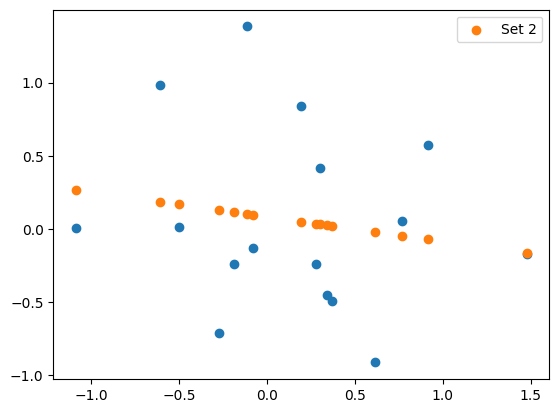

In [ ]:
with torch.no_grad():
  ypred = (a*xs) + b
  plt.scatter(xs, ys)
  plt.scatter(xs, ypred, label="Set 2")

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# cubic regression
#linear regression
num_points = 16
xs = torch.randn(num_points)
ys = torch.randn(num_points)
# y = ax + b
a = torch.randn(1)
b = torch.randn(1)
c = torch.randn(1)
d = torch.randn(1)
params = [a,b,c,d]
for p in params:
  p.requires_grad = True
#training loop
num_epochs = 1000
lr = 0.05
for epoch in range(num_epochs):
  outs = ((a * xs)**3) + ((b*xs)**2) + (c*xs) + d
  loss = ((ys - outs) ** 2).mean()
  for p in params:
    p.grad = None
  loss.backward()
  if epoch % 100 == 0:
    print(loss.item())
  for p in params:
    p.data -= p.grad * lr
print(loss)

15.43448257446289
1.2387044429779053
1.2380133867263794
1.2376785278320312
1.2360916137695312
1.2300400733947754
1.226574420928955
1.2261080741882324
1.2260643243789673
1.2260605096817017
tensor(1.2261, grad_fn=<MeanBackward0>)


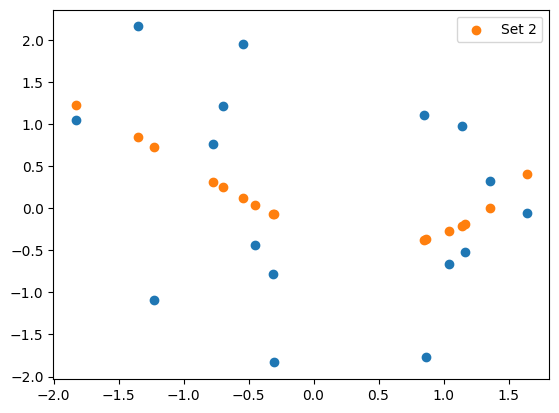

In [ ]:
with torch.no_grad():
  ypred = ((a * xs)**3) + ((b*xs)**2) + (c*xs) + d
  plt.scatter(xs, ys)
  plt.scatter(xs, ypred, label="Set 2")

# Add a legend
plt.legend()

# Show the plot
plt.show()